In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
game=pd.read_csv("game_data_analysis/games.csv")

In [3]:
game.count()

Unnamed: 0           1512
Title                1512
Release Date         1512
Team                 1511
Rating               1499
Times Listed         1512
Number of Reviews    1512
Genres               1512
Summary              1511
Reviews              1512
Plays                1512
Playing              1512
Backlogs             1512
Wishlist             1512
dtype: int64

In [10]:
game.shape

(1512, 14)

In [11]:
type(game)

pandas.core.frame.DataFrame

In [4]:
game.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [10]:
mean_game=game["Rating"].mean()
print(mean_game)

3.7193462308205465


In [30]:
game.isnull().sum().sum()

np.int64(15)

In [5]:
game_2=game

In [6]:
type(game_2)

pandas.core.frame.DataFrame

In [7]:
copy_summary_from = game_2.loc[game_2['Title'] == "Death Stranding", 'Summary'].values[0]


In [8]:
# game_2['Summary'].fillna(copy_summary_from, inplace=True)
# it replace the all nan value in summary column but i need to replace for specific title 

In [9]:
game_2.loc[(game_2['Title'] == "Death Stranding 2") & (game_2['Summary'].isnull()), 'Summary'] = copy_summary_from


In [10]:
game_2.isnull().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               0
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [12]:
(game["Title"].value_counts()>1).sum()

np.int64(279)

In [13]:

def convert_shorthand(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)
game_2['Times Listed'] = game_2['Times Listed'].apply(convert_shorthand)
game_2['Plays'] = game_2['Plays'].apply(convert_shorthand)
game_2['Playing'] = game_2['Playing'].apply(convert_shorthand)
game_2['Backlogs'] = game_2['Backlogs'].apply(convert_shorthand)
game_2['Wishlist'] = game_2['Wishlist'].apply(convert_shorthand)
game_2['Number of Reviews'] = game_2['Number of Reviews'].apply(convert_shorthand)
game_2['Rating']=game_2['Rating'].fillna(game_2['Rating'].mean())

In [110]:
game_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1117 non-null   object 
 1   Release Date       1114 non-null   object 
 2   Team               1117 non-null   object 
 3   Rating             1117 non-null   float64
 4   Times Listed       1117 non-null   float64
 5   Number of Reviews  1117 non-null   float64
 6   Genres             1117 non-null   object 
 7   Summary            1117 non-null   object 
 8   Reviews            1117 non-null   object 
 9   Plays              1117 non-null   float64
 10  Playing            1117 non-null   float64
 11  Backlogs           1117 non-null   float64
 12  Wishlist           1117 non-null   float64
dtypes: float64(7), object(6)
memory usage: 113.6+ KB


In [84]:
game_2.drop(["Team_single"],axis=1,inplace=True)

In [29]:
game_2=pd.read_csv("game_2.csv")

In [30]:
game_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1117 non-null   object 
 1   Release Date       1114 non-null   object 
 2   Team               1117 non-null   object 
 3   Rating             1117 non-null   float64
 4   Times Listed       1117 non-null   float64
 5   Number of Reviews  1117 non-null   float64
 6   Genres             1117 non-null   object 
 7   Summary            1117 non-null   object 
 8   Reviews            1117 non-null   object 
 9   Plays              1117 non-null   float64
 10  Playing            1117 non-null   float64
 11  Backlogs           1117 non-null   float64
 12  Wishlist           1117 non-null   float64
dtypes: float64(7), object(6)
memory usage: 113.6+ KB


In [32]:
game_2['Team'] = game_2['Team'].apply(lambda x: x[1:-1] if len(x) > 1 else x)
game_2['Team'] = game_2['Team'].str.replace("'", "", regex=True)
game_2['Team'] =game_2['Team'].apply(lambda x: x.split(', '))


In [33]:
game_2['Genres'] = game_2['Genres'].apply(lambda x: x[1:-1] if len(x) > 1 else x)
game_2['Genres'] = game_2['Genres'].str.replace("'", "", regex=True)
game_2['Genres'] =game_2['Genres'].apply(lambda x: x.split(', '))

In [111]:
game_2=pd.read_csv("game_2.csv")

In [6]:
vgsales=pd.read_csv("game_data_analysis/vgsales.csv")

In [64]:
vgsales_2['Year'] = pd.to_datetime(vgsales_2['Year'], format='%Y', errors='coerce')

In [66]:
vgsales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [62]:
vgsales_2['Year'].isnull().sum()

np.int64(270)

In [61]:
vgsales_2.isnull().any(axis=1).sum()

np.int64(306)

In [57]:
vgsales_2["Name"].value_counts()

Name
Need for Speed: Most Wanted      12
Ratatouille                       9
Madden NFL 07                     9
FIFA 14                           9
LEGO Marvel Super Heroes          9
                                 ..
Farming 2017 - The Simulation     1
Kinect Adventures!                1
Wii Fit Plus                      1
Wii Fit                           1
Nintendogs                        1
Name: count, Length: 11493, dtype: int64

In [60]:
vgsales_2 = vgsales_2.drop_duplicates(subset=["Name", "Platform","Year","Genre","Publisher"], keep="first")

In [5]:
game_2=pd.read_csv("game_2.csv")

In [60]:
game_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1117 non-null   object 
 1   Release Date       1114 non-null   object 
 2   Team               1117 non-null   object 
 3   Rating             1117 non-null   float64
 4   Times Listed       1117 non-null   float64
 5   Number of Reviews  1117 non-null   float64
 6   Genres             1117 non-null   object 
 7   Summary            1117 non-null   object 
 8   Reviews            1117 non-null   object 
 9   Plays              1117 non-null   float64
 10  Playing            1117 non-null   float64
 11  Backlogs           1117 non-null   float64
 12  Wishlist           1117 non-null   float64
 13  year               1114 non-null   Int64  
dtypes: Int64(1), float64(7), object(6)
memory usage: 123.4+ KB


In [59]:
game_2["Release Date"] = pd.to_datetime(game_2["Release Date"], errors='coerce').dt.strftime('%Y-%m-%d')



In [ ]:
game_2["year"] = game_2["Release Date"].dt.year

In [42]:
game_2["year"] = game_2["year"].astype("Int64") 


In [50]:
row["Release Date"] = row["Release Date"].strftime('%Y-%m-%d') if pd.notna(row["Release Date"]) else "0000-00-00"



In [57]:
row["Release Date"] = row["Release Date"].date()


In [207]:
game_2.drop(["date"], axis=1, inplace=True)


In [56]:
vgsales_2=pd.read_csv("vgsales_2.csv")

In [2]:
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    autocommit=True
  )
mycursor=mydb.cursor(buffered=True)


In [122]:
mycursor.execute("create database if not exists video_game_sales_report ")


In [211]:
game_2.columns


Index(['Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist', 'year'],
      dtype='object')

In [2]:
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="video_game_sales_report",
    autocommit=True
  )
mycursor=mydb.cursor(buffered=True)

In [55]:
mycursor.execute("""create table if not exists game(
                 Title text,
                 Release_Date date,
                 Team text,
                 Rating float,
                 Times_Listed float,
                 Number_of_Reviews float,
                 Genres text,
                 Summary text,
                 Reviews text,
                 Plays float,
                 Playing float,
                 Backlogs float,
                 Wishlist float,
                 year int
                 )""")
                 

In [61]:
for index, row in game_2.iterrows():
    row["Team"] = ",".join(row["Team"]) if isinstance(row["Team"], list) else row["Team"]
    row["Genres"] = ",".join(row["Genres"]) if isinstance(row["Genres"], list) else row["Genres"]
    row = row.replace({np.nan: None})

    mycursor.execute("""
        INSERT INTO game (
            Title, Release_Date, Team, Rating, Times_Listed, Number_of_Reviews, 
            Genres, Summary, Reviews, Plays, Playing, Backlogs, Wishlist, year
        ) VALUES(%s, STR_TO_DATE(%s, '%Y-%m-%d'), %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))



In [123]:
mycursor.execute("select * from game ")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
c = pd.DataFrame(results, columns=columns)
c

,Title,Release_Date,Team,Rating,Times_Listed,Number_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,year
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment,FromSoftware",4.5,3900.0,3900.0,"Adventure,RPG","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000.0,3800.0,4600.0,4800.0,2022.0
1,Hades,2019-12-10,Supergiant Games,4.3,2900.0,2900.0,"Adventure,Brawler,Indie,RPG",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000.0,3200.0,6300.0,3600.0,2019.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo,Nintendo EPD Production Group No. 3",4.4,4300.0,4300.0,"Adventure,RPG",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,2017.0
3,Undertale,2015-09-15,"tobyfox,8-4",4.2,3500.0,3500.0,"Adventure,Indie,RPG,Turn Based Strategy","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0,2015.0
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000.0,3000.0,"Adventure,Indie,Platform",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000.0,2400.0,8300.0,2300.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,Back to the Future: The Game,2010-12-22,Telltale Games,3.2,94.0,94.0,"Adventure,Point-and-Click",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763.0,5.0,223.0,67.0,2010.0
1113,Team Sonic Racing,2019-05-21,"Sumo Digital,Sega",2.9,264.0,264.0,"Arcade,Racing",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500.0,49.0,413.0,107.0,2019.0
1114,Dragon's Dogma,2012-05-22,Capcom,3.7,210.0,210.0,"Brawler,RPG","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100.0,45.0,487.0,206.0,2012.0
1115,Baldur's Gate 3,2020-10-06,Larian Studios,4.1,165.0,165.0,"Adventure,RPG,Strategy,Tactical,Turn Based Str...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269.0,79.0,388.0,602.0,2020.0


In [23]:
vgsales=pd.read_csv("game_data_analysis/vgsales.csv")

In [222]:
vgsales["Year"] = vgsales["Year"].astype("Int64")

In [228]:
vgsales.drop(["year"],axis=1,inplace=True)

In [241]:
mycursor.execute("""create table if not exists vgsales(
                 `Rank` int,
                 Name text ,
                 Platform text,
                 Year int,
                 Genre text,
                 Publisher text,
                 NA_Sales float,
                 EU_Sales float,
                 JP_Sales float,
                 Other_Sales float,
                 Global_Sales float
                 
                 )""")

In [248]:
for index, row in vgsales.iterrows():
    # row["Team"] = ",".join(row["Team"]) if isinstance(row["Team"], list) else row["Team"]
    row = row.replace({np.nan: None})

    mycursor.execute("""
        INSERT INTO vgsales (
            `Rank`, Name, Platform, Year,Genre ,
            Publisher, NA_Sales, EU_Sales,JP_Sales,Other_Sales,Global_Sales
        ) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))


In [ ]:
mycursor.execute("select * from vgsales")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
vg = pd.DataFrame(results, columns=columns)
vg

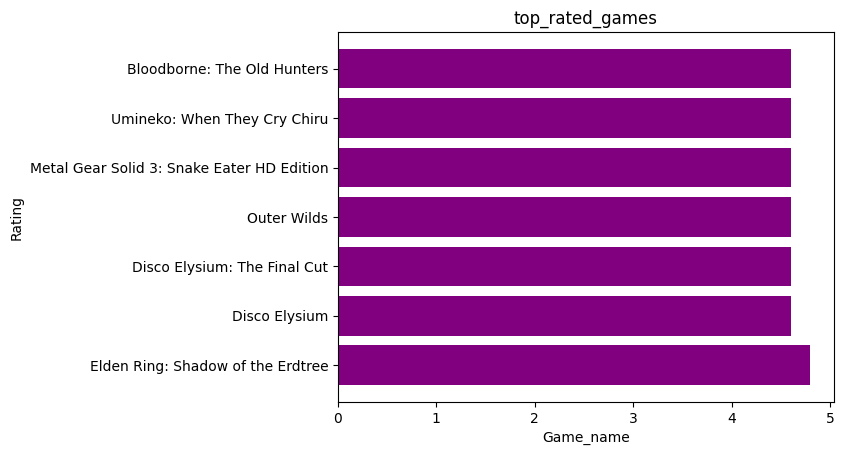

In [5]:
# 1.What are the top-rated games by user reviews?
mycursor.execute("select Title,Rating from game where Rating>=4.5 order by Rating desc limit 15")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
top_rated_games = pd.DataFrame(results, columns=["Title","Rating"])
top_rated_games
plt.barh(top_rated_games["Title"],top_rated_games["Rating"], color='purple')

plt.title('top_rated_games')
plt.xlabel('Game_name')
plt.ylabel('Rating')
plt.show()

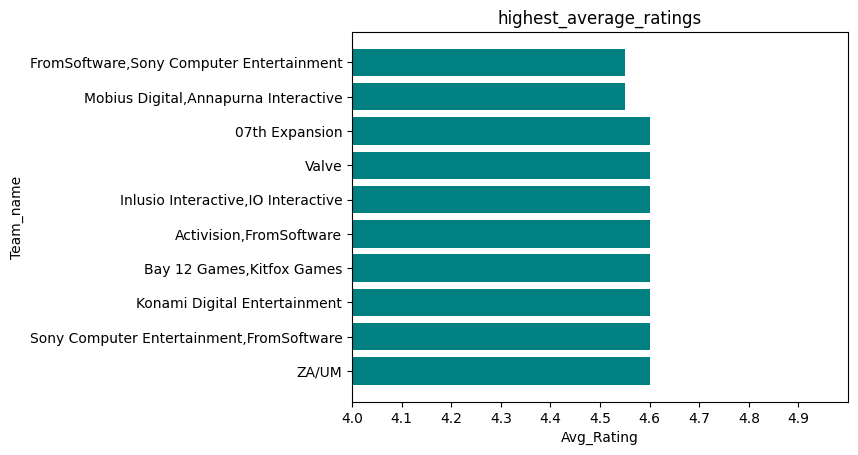

In [63]:
#2. Which developers (Teams) have the highest average ratings?
mycursor.execute("select Team,avg(Rating) as Avg_Rating from game group by Team order by Avg_Rating desc limit 10")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
highest_average_ratings = pd.DataFrame(results, columns=["Team","Avg_Rating"])
highest_average_ratings
plt.barh(highest_average_ratings["Team"],highest_average_ratings["Avg_Rating"],color="teal")

plt.title('highest_average_ratings')
plt.xlabel('Avg_Rating')
plt.ylabel('Team_name')
plt.xlim(4, 5)  # Set range from 4 to 5
plt.xticks(np.arange(4, 5.0, 0.1))

plt.show()

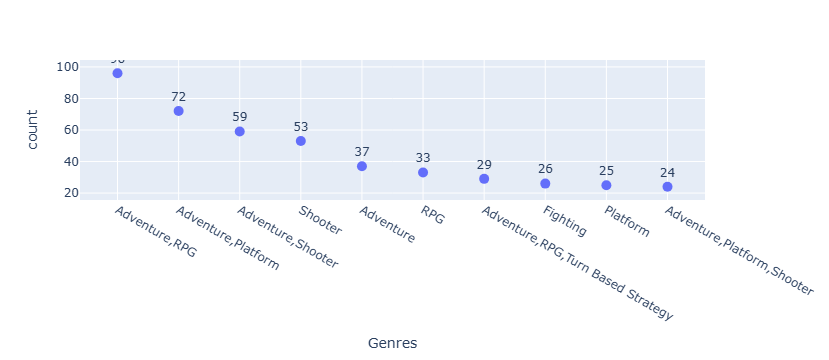

In [62]:
#3.What are the most common genres in the dataset?
mycursor.execute("select Genres,count(Title) as count from game group by Genres order by count desc limit 10")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
common_genres = pd.DataFrame(results, columns=["Genres","count"])
common_genres
fig = px.scatter(common_genres, x='Genres', y='count', text='count')

# Enable hover tooltips automatically
fig.update_traces(marker=dict(size=10), textposition="top center")

fig.show()



                                      Title  \
0                             Hollow Knight   
1                                  Yakuza 0   
2                                     Hades   
3                            NieR: Automata   
4                  The Witcher 3: Wild Hunt   
5                                   Celeste   
6                                Bloodborne   
7                     Red Dead Redemption 2   
8                                   Control   
9                          Persona 4 Golden   
10                          Persona 5 Royal   
11  The Legend of Zelda: Breath of the Wild   
12                        Final Fantasy VII   
13             Disco Elysium: The Final Cut   
14                                Bayonetta   

                                  Genres  Backlogs  Wishlist  
0               Adventure,Indie,Platform    8300.0    2300.0  
1        Adventure,Brawler,RPG,Simulator    6400.0    2000.0  
2            Adventure,Brawler,Indie,RPG    6300.0    3600

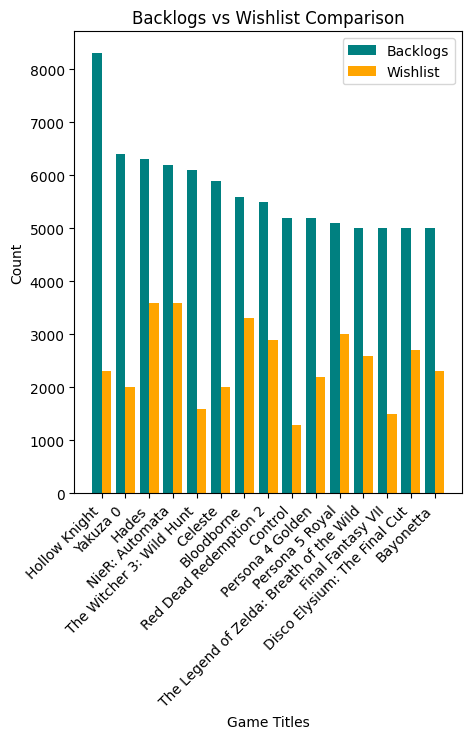

In [3]:
 #4. Which games have the highest backlog compared to wishlist?
mycursor.execute("select Title,Genres, Backlogs, Wishlist from game where Backlogs > Wishlist order by Backlogs desc limit 15")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
highest_backlog = pd.DataFrame(results, columns=["Title","Genres","Backlogs","Wishlist"])
highest_backlog = highest_backlog.drop_duplicates(subset=["Title"],keep="first")
print(highest_backlog)
# Set width for bars
bar_width = 0.4
x = np.arange(len(highest_backlog["Title"]))  # X positions

# Create bar chart
fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(x - bar_width/2, highest_backlog["Backlogs"], width=bar_width, label="Backlogs", color="teal")
ax.bar(x + bar_width/2, highest_backlog["Wishlist"], width=bar_width, label="Wishlist", color="orange")

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(highest_backlog["Title"], rotation=45, ha='right')
ax.set_xlabel("Game Titles")
ax.set_ylabel("Count")
ax.set_title("Backlogs vs Wishlist Comparison")
ax.legend()

plt.show()



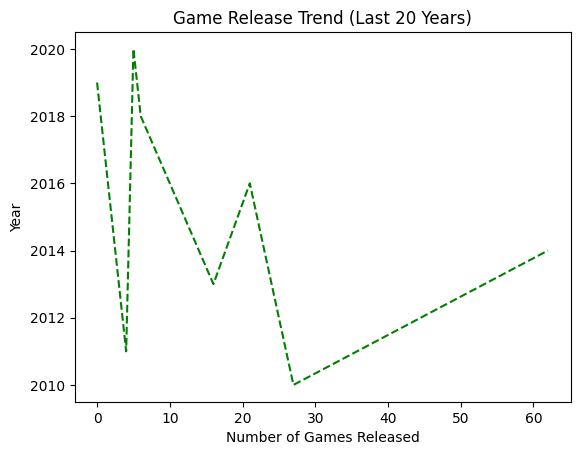

In [65]:
# 5.What is the game release trend across years?
mycursor.execute("select year from game where year  between  2010 and 2020 ")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
trend_across_years = pd.DataFrame(results, columns=["year"])
trend_across_years = trend_across_years.drop_duplicates(subset=["year"],keep="first")


plt.plot(trend_across_years["year"],color="g",linestyle="--")
plt.ylabel("Year")
plt.xlabel("Number of Games Released")
plt.title("Game Release Trend (Last 20 Years)")
plt.show()

                                        Title  \
0                                  Elden Ring   
1                                       Hades   
2     The Legend of Zelda: Breath of the Wild   
3                                   Undertale   
4                               Hollow Knight   
...                                       ...   
1112             Back to the Future: The Game   
1113                        Team Sonic Racing   
1114                           Dragon's Dogma   
1115                          Baldur's Gate 3   
1116                 The LEGO Movie Videogame   

                                                 Genres  Rating Release_date  
0                                         Adventure,RPG     4.5   2022-02-25  
1                           Adventure,Brawler,Indie,RPG     4.3   2019-12-10  
2                                         Adventure,RPG     4.4   2017-03-03  
3               Adventure,Indie,RPG,Turn Based Strategy     4.2   2015-09-15  
4               

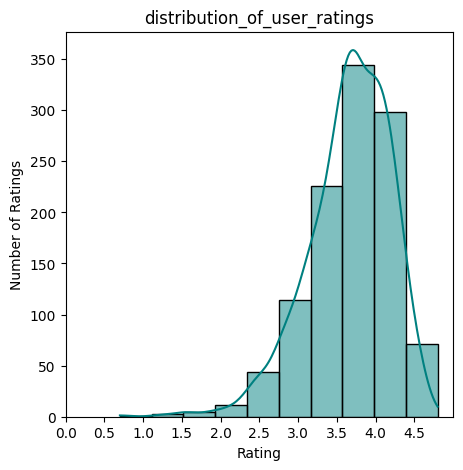

In [6]:
# 6.What is the distribution of user ratings?
mycursor.execute("select Title,Genres,Rating,Release_date from game ")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
distribution_of_user_ratings = pd.DataFrame(results, columns=["Title","Genres","Rating","Release_date"])
distribution_of_user_ratings = distribution_of_user_ratings.drop_duplicates(subset=["Title","Release_date"],keep="first")
print(distribution_of_user_ratings)
plt.figure(figsize=(5, 5))
sns.histplot(distribution_of_user_ratings["Rating"], bins=10, kde=True, color="teal")

# Labels and title
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("distribution_of_user_ratings")
plt.xlim(0, 5)  # Set range from 4 to 5
plt.xticks(np.arange(0, 5.0, 0.5))
plt.show()



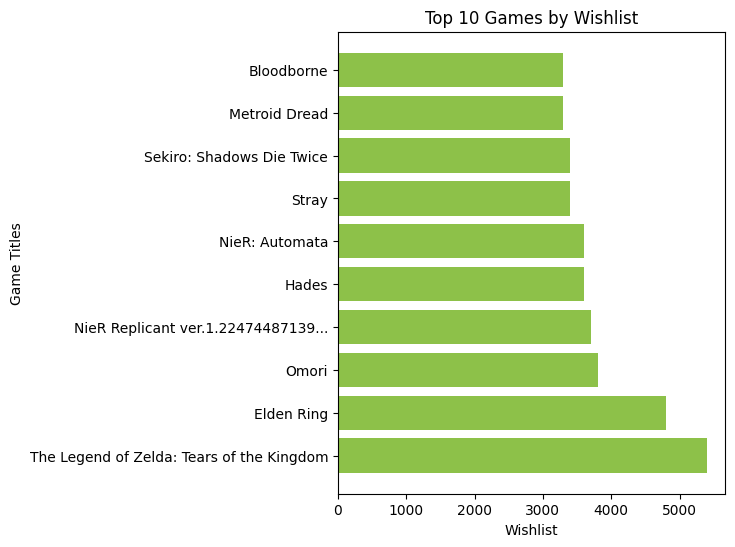

In [67]:
# 7.What are the top 10 most wishlisted games?
mycursor.execute("select Title,Release_date, Wishlist from game  order by Wishlist desc")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
top_10 = pd.DataFrame(results, columns=["Title","Release_date","Wishlist"])
top_10 = top_10.drop_duplicates(subset=["Title","Release_date"],keep="first")
top_10=top_10.head(10)
top_10

plt.figure(figsize=(5, 6))
plt.barh(top_10["Title"],top_10["Wishlist"], color="#8DC149")

# Labels and title
plt.xlabel("Wishlist")
plt.ylabel("Game Titles")
plt.title("Top 10 Games by Wishlist")
# plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()


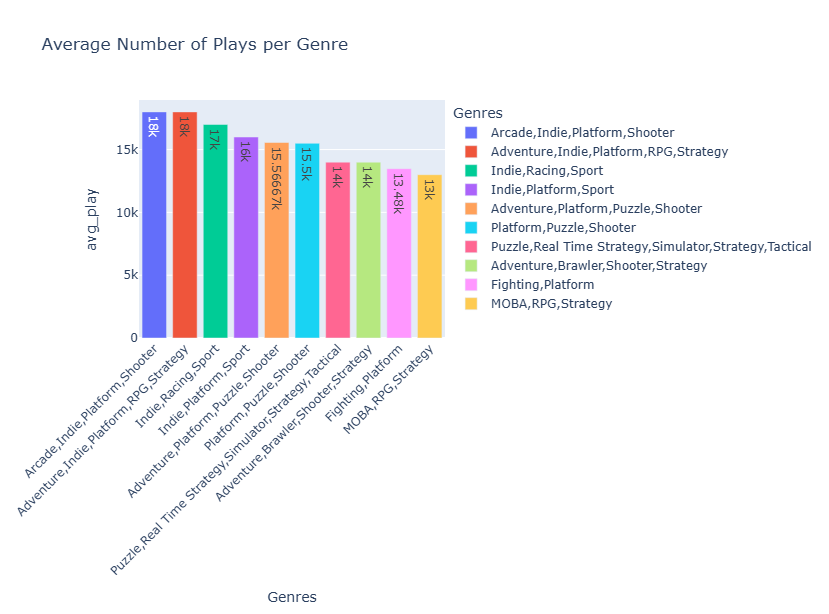

In [82]:
# 8.What’s the average number of plays per genre?
mycursor.execute("select Genres,avg(Plays)as avg_play from game group by Genres order by avg_play desc limit 10 ")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
avg_plays_per_genre = pd.DataFrame(results, columns=["Genres","avg_play"])
avg_plays_per_genre

fig = px.bar(
    avg_plays_per_genre,  
    x="Genres",  
    y="avg_play",  
    title="Average Number of Plays per Genre",  
    color="Genres",  # Color by genre for differentiation
    text_auto=True  # Display values on bars
)

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability
fig.update_layout(
    width=900,  # Increase width
    height=600)
fig.show()



In [4]:
#9. Which developer studios are the most productive and impactful?
mycursor.execute("select Team,Genres,count(Title) production from game group by Team,Genres order by production desc limit 10 ")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
most_productive_impactful = pd.DataFrame(results, columns=["Team","Genres","production"])
print(most_productive_impactful)


fig = px.line(most_productive_impactful, x="Team", y="production", title="most productive and impactful developer studios")
fig.update_layout(
    width=900,  # Increase width
    height=500,  # Increase height
    yaxis=dict(
        
        tickmode="linear",
        tick0=2,  # Start at 5
        dtick=2  # Step size of 5 (5, 10, 15, ...)
    )
)

fig.show()


                                    Team                             Genres  \
0                    Nintendo,Game Freak  Adventure,RPG,Turn Based Strategy   
1                            Square Enix                      Adventure,RPG   
2                  Nintendo EAD,Nintendo                 Adventure,Platform   
3                  Nintendo,Nintendo EAD                 Adventure,Platform   
4                               Nintendo                 Adventure,Platform   
5                                 Capcom                  Adventure,Shooter   
6                            Square Enix                                RPG   
7                        Sonic Team,Sega                           Platform   
8  Intelligent Systems Co.,Ltd.,Nintendo   RPG,Strategy,Turn Based Strategy   
9                                 Capcom                 Adventure,Platform   

   production  
0          12  
1           9  
2           5  
3           5  
4           4  
5           4  
6           4  
7 

   Total_NA_Sales  Total_EU_Sales  Total_JP_Sales  Total_Other_Sales
0     4392.950002     2434.129998     1291.019999         797.749996


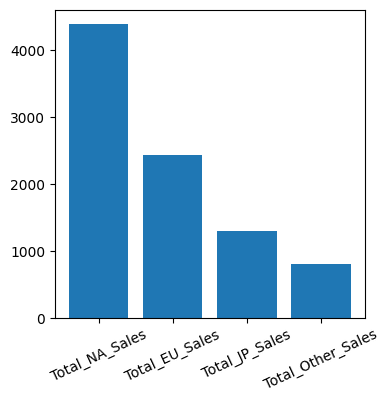

In [68]:
  #10.Which region generates the most game sales?
mycursor.execute("""select sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales from vgsales """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
region_Wise_Sales = pd.DataFrame(results, columns=["Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales"])
print(region_Wise_Sales)

regions = region_Wise_Sales.columns.tolist()
sales = region_Wise_Sales.iloc[0].tolist()

plt.figure(figsize=(4,4))
plt.bar(regions,sales)

plt.xticks(rotation=25)

plt.show()       

  Platform  Total_NA_Sales  Total_EU_Sales  Total_JP_Sales  Total_Other_Sales  \
0      PS2      583.840000      339.289999      139.199999         193.440000   
1     X360      601.050001      280.580000       12.430000          85.540000   
2      PS3      392.260000      343.710001       79.990000         141.929999   
3      Wii      507.710001      268.380001       69.350000          80.610000   
4       DS      390.710000      194.650000      175.570000          60.530000   
5       PS      336.509999      213.600000      139.820000          40.910000   
6      GBA      187.540000       75.250000       47.330000           7.730000   
7      PSP      108.990000       68.250000       76.790000          42.190000   
8      PS4       96.800000      123.699999       14.300000          43.360000   
9       PC       93.280000      139.679999        0.170000          24.860000   

   Total_sales  
0  1255.639997  
1   979.960000  
2   957.839998  
3   926.709997  
4   822.490001  
5   73

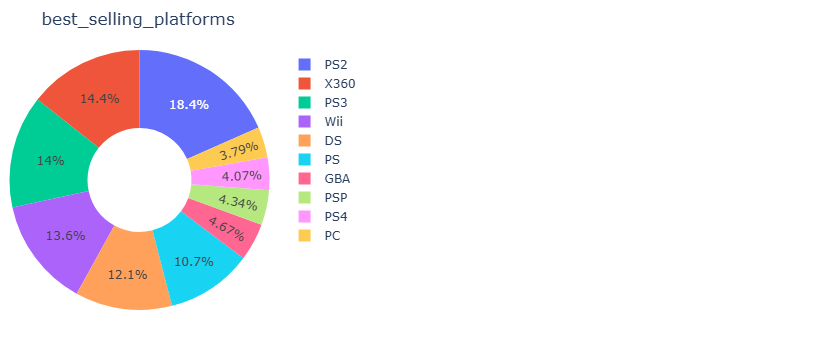

In [10]:
# 11.What are the best-selling platforms?

mycursor.execute("""select Platform,sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales, sum(Global_Sales) Total_sales from vgsales 
                    group by Platform 
                    order by Total_sales desc limit 10  """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
best_selling_platforms = pd.DataFrame(results, columns=["Platform","Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales","Total_sales"])
print(best_selling_platforms)

fig = px.pie(best_selling_platforms, names="Platform", values="Total_sales", title="best_selling_platforms", 
             color="Platform",hole=0.4)
fig = go.Figure(fig)
fig.update_layout(
    margin=dict(l=0, r=550, t=50, b=50),  # More space on the right
    showlegend=True  # Shows the labels in legend
)


fig.show()



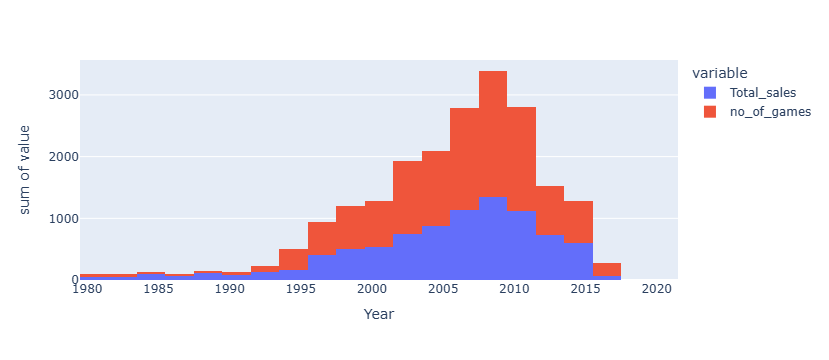

In [5]:
# 12.What’s the trend of game releases and sales over years?
# `Rank`, Name, Platform, Year,Genre ,
#             Publisher, NA_Sales, EU_Sales,JP_Sales,Other_Sales,Global_Sales
mycursor.execute("""select  count(distinct Name) no_of_games  ,Year, sum(Global_Sales) Total_sales from vgsales
                  group by Year 
                  order by Total_sales desc   """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
sales_over_years = pd.DataFrame(results, columns=["no_of_games","Year","Total_sales"])
sales_over_years
px.histogram(sales_over_years,x="Year",y=["Total_sales","no_of_games"],nbins=30,)



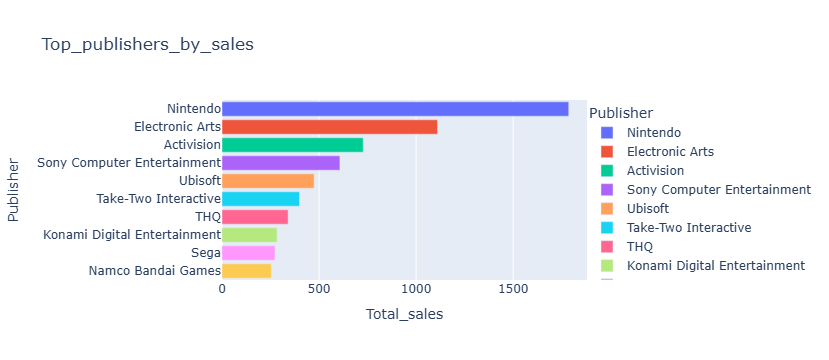

In [59]:
# 13.Who are the top publishers by sales?
mycursor.execute("""select Publisher,sum(Global_Sales) Total_sales from vgsales 
                    group by Publisher 
                    order by Total_sales desc limit 10   """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
top_publishers_by_sales = pd.DataFrame(results, columns=["Publisher","Total_sales"])
top_publishers_by_sales

fig = px.bar(top_publishers_by_sales, 
             x='Total_sales', 
             y='Publisher', 
             color='Publisher', 
             orientation='h', 
             title='Top_publishers_by_sales')

# Move legend to top right
fig.update_layout(legend=dict(x=1, y=1))  # Positions legend in upper right

# Show plot
fig.show()


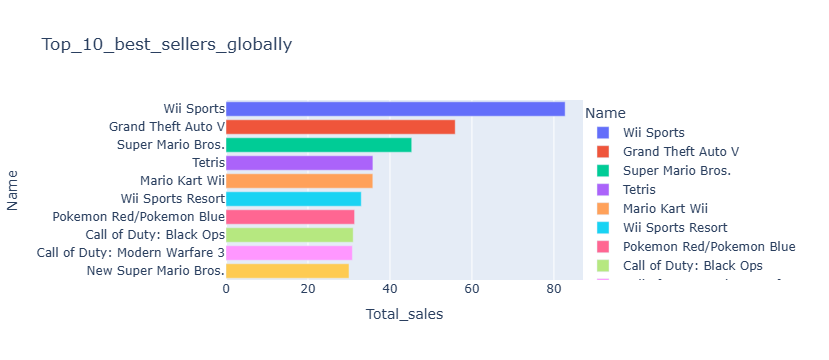

In [58]:
#14. Which games are the top 10 best-sellers globally?

mycursor.execute("""select Name,sum(Global_Sales) Total_sales from vgsales 
                    group by Name
                    order by Total_sales desc limit 10 """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
Top_10_best_sellers_globally = pd.DataFrame(results, columns=["Name","Total_sales"])
Top_10_best_sellers_globally

fig = px.bar(Top_10_best_sellers_globally, 
             x='Total_sales', 
             y='Name', 
             color='Name', 
             orientation='h', 
             title='Top_10_best_sellers_globally')

# Move legend to top right
fig.update_layout(legend=dict(x=1, y=1))  # Positions legend in upper right

# Show plot
fig.show()

   Platform  Total_NA_Sales  Total_EU_Sales  Total_JP_Sales  Total_Other_Sales
0       Wii      507.710001      268.380001       69.350000          80.610000
1       NES      125.940000       21.150000       98.650000           5.310000
2        GB      114.320001       47.820000       85.120000           8.200000
3        DS      390.710000      194.650000      175.570000          60.530000
4      X360      601.050001      280.580000       12.430000          85.540000
5       PS3      392.260000      343.710001       79.990000         141.929999
6       PS2      583.840000      339.289999      139.199999         193.440000
7      SNES       61.230000       19.040000      116.550000           3.220000
8       GBA      187.540000       75.250000       47.330000           7.730000
9       3DS       78.870000       58.520000       97.350000          12.630000
10      PS4       96.800000      123.699999       14.300000          43.360000
11      N64      139.020000       41.060000       34

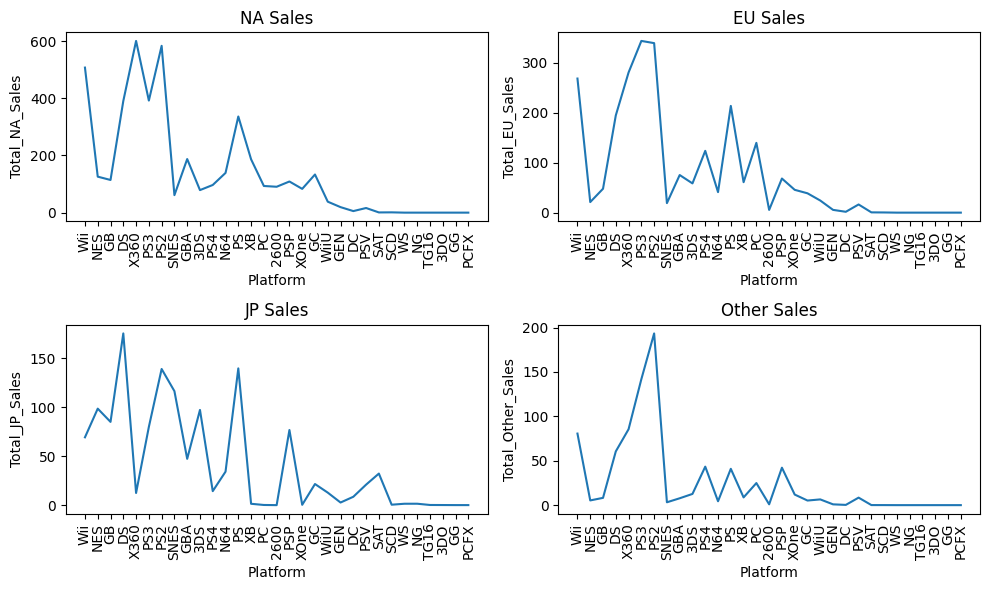

In [17]:
# 15.How do regional sales compare for specific platforms?

mycursor.execute("""select Platform, sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales from vgsales group by Platform """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
sales_compare = pd.DataFrame(results, columns=["Platform","Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales"])
print(sales_compare)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot each sales region manually
sns.lineplot(data=sales_compare, x="Platform", y="Total_NA_Sales", ax=axes[0, 0])
axes[0, 0].set_title("NA Sales")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.lineplot(data=sales_compare, x="Platform", y="Total_EU_Sales", ax=axes[0, 1])
axes[0, 1].set_title("EU Sales")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.lineplot(data=sales_compare, x="Platform", y="Total_JP_Sales", ax=axes[1, 0])
axes[1, 0].set_title("JP Sales")
axes[1, 0].tick_params(axis='x', rotation=90)

sns.lineplot(data=sales_compare, x="Platform", y="Total_Other_Sales", ax=axes[1, 1])
axes[1, 1].set_title("Other Sales")
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

      Year  no_of_platforms  Total_Sales
0   2020.0                1     0.290000
1   1980.0                1    11.380000
2   1981.0                1    35.770000
3   1982.0                1    28.860000
4   1983.0                2    16.790000
5   1984.0                2    50.360000
6   1986.0                2    37.070000
7   1987.0                2    21.740000
8   2017.0                2     0.050000
9   1989.0                3    73.450000
10  1985.0                4    53.940002
11  1988.0                4    47.220001
12  1990.0                4    49.390000
13  1991.0                4    32.230000
14  1993.0                5    45.980000
15  1992.0                6    76.160001
16  2003.0                6   357.849999
17  1997.0                6   200.980000
18  1998.0                7   256.470001
19  2004.0                7   419.309999
20  2009.0                7   667.300000
21  2010.0                7   600.449999
22  1995.0                8    88.110000
23  2005.0      

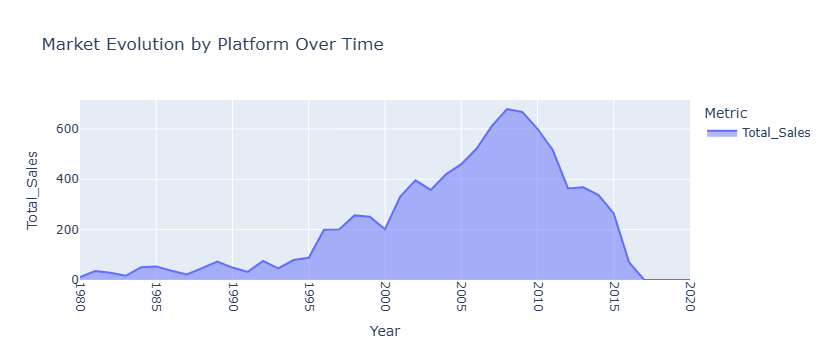

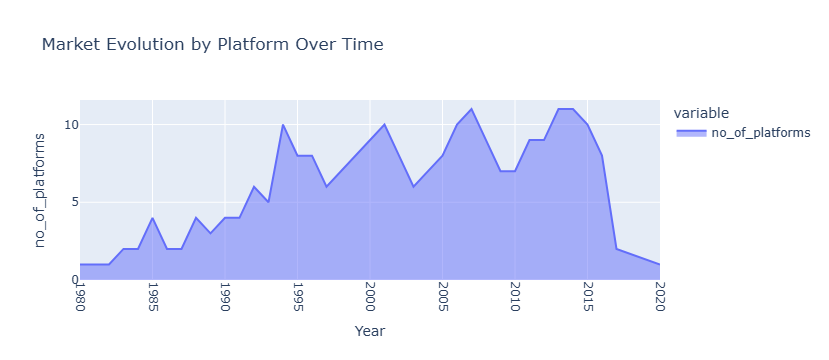

In [61]:
# 16.How has the market evolved by platform over time?
mycursor.execute("""select Year,count(distinct Platform) no_of_platforms, sum(Global_Sales) Total_Sales from vgsales
                  group by Year
                  order by no_of_platforms """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
Market_Evolution_by_Platform = pd.DataFrame(results, columns=["Year","no_of_platforms","Total_Sales"])
print(Market_Evolution_by_Platform)
fig = px.area(
    Market_Evolution_by_Platform,
    x="Year",
    y=[ "Total_Sales"],
    labels={"value": "Total_Sales", "variable": "Metric"},
    title="Market Evolution by Platform Over Time"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


fig = px.area(
    Market_Evolution_by_Platform,
    x="Year",
    y=[ "no_of_platforms"],
    labels={"value": "no_of_platforms"},
    title="Market Evolution by Platform Over Time"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()




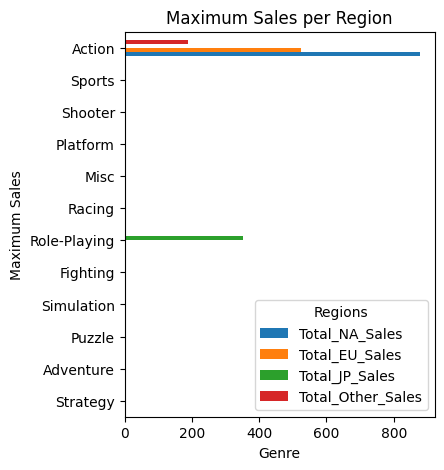

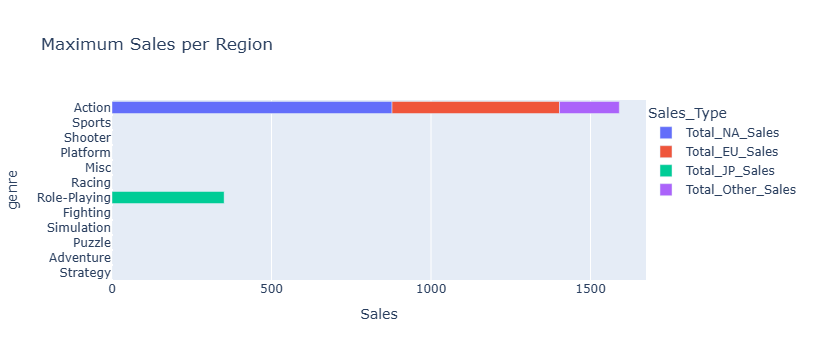

In [6]:
 #17. What are the regional genre preferences?
mycursor.execute("""select Genre, sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales from vgsales 
                     group by Genre 
                     order by Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales  """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
regional_genre_preferences = pd.DataFrame(results, columns=["genre","Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales"])
regional_genre_preferences

for col in regional_genre_preferences.columns[1:]:  # Excluding 'Genre'
    max_val = regional_genre_preferences[col].max()
    regional_genre_preferences[col] = regional_genre_preferences[col].apply(lambda x: x if x == max_val else "0")

regional_genre_preferences



regional_genre_preferences.set_index('genre').astype(float).plot(kind='barh', figsize=(4, 5), legend=True)
plt.legend(title="Regions", loc='lower right')

plt.title('Maximum Sales per Region')
plt.ylabel('Maximum Sales')
plt.xlabel('Genre')
plt.show()



regional_genre_preferences_melted = regional_genre_preferences.melt(id_vars=['genre'], var_name='Sales_Type', value_name='Sales')

# Create interactive bar chart with Plotly
fig = px.bar(regional_genre_preferences_melted, 
             x='Sales', 
             y='genre', 
             color='Sales_Type', 
             orientation='h', 
             title='Maximum Sales per Region')

# Move legend to top right
fig.update_layout(legend=dict(x=1, y=1))  # Positions legend in upper right

# Show plot
fig.show()


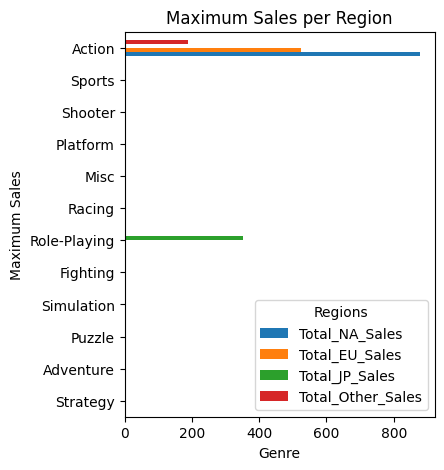

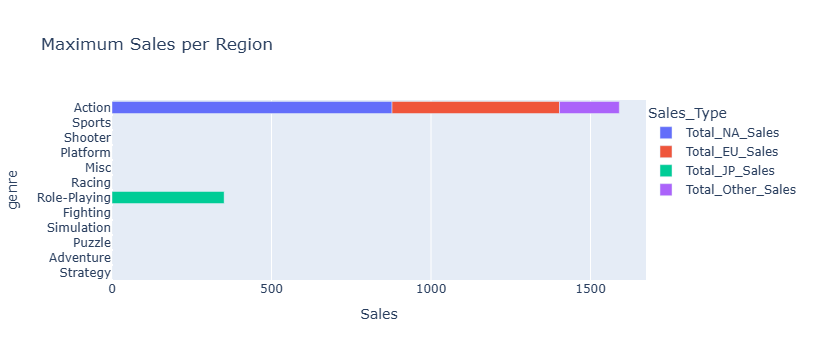

In [6]:
 #17. What are the regional genre preferences?
mycursor.execute("""select Genre, sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales from vgsales 
                     group by Genre 
                     order by Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales  """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
regional_genre_preferences = pd.DataFrame(results, columns=["genre","Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales"])
regional_genre_preferences

for col in regional_genre_preferences.columns[1:]:  # Excluding 'Genre'
    max_val = regional_genre_preferences[col].max()
    regional_genre_preferences[col] = regional_genre_preferences[col].apply(lambda x: x if x == max_val else "0")

regional_genre_preferences



regional_genre_preferences.set_index('genre').astype(float).plot(kind='barh', figsize=(4, 5), legend=True)
plt.legend(title="Regions", loc='lower right')

plt.title('Maximum Sales per Region')
plt.ylabel('Maximum Sales')
plt.xlabel('Genre')
plt.show()



regional_genre_preferences_melted = regional_genre_preferences.melt(id_vars=['genre'], var_name='Sales_Type', value_name='Sales')

# Create interactive bar chart with Plotly
fig = px.bar(regional_genre_preferences_melted, 
             x='Sales', 
             y='genre', 
             color='Sales_Type', 
             orientation='h', 
             title='Maximum Sales per Region')

# Move legend to top right
fig.update_layout(legend=dict(x=1, y=1))  # Positions legend in upper right

# Show plot
fig.show()


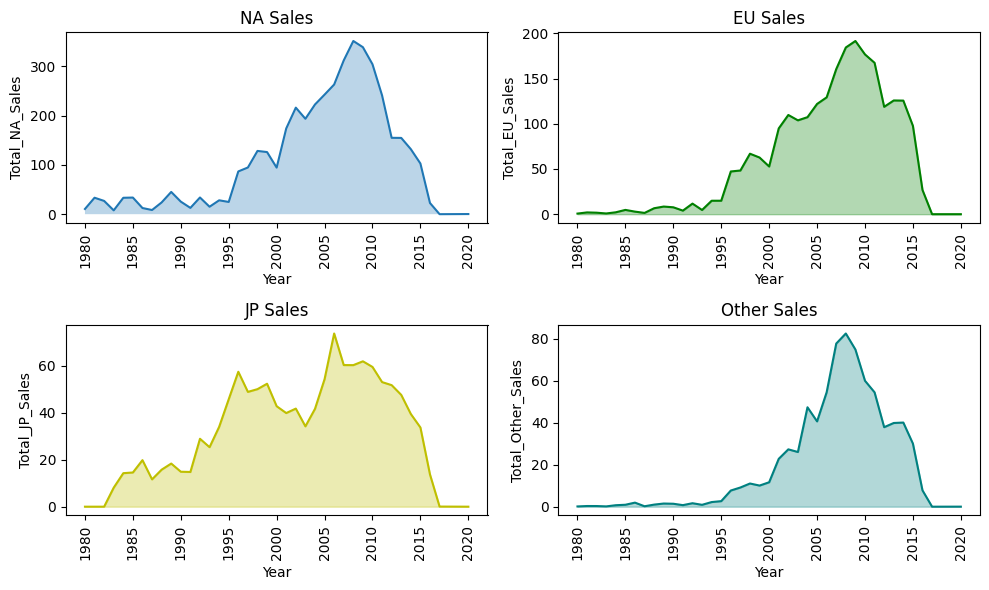

In [22]:
# 18.What’s the yearly sales change per region?
mycursor.execute("""select Year, sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales from vgsales 
                     group by Year 
                     order by Year limit 50 offset 1""")
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
yearly_sales_per_region = pd.DataFrame(results, columns=["Year","Total_NA_Sales","Total_EU_Sales","Total_JP_Sales","Total_Other_Sales"])
yearly_sales_per_region



fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# NA Sales
sns.lineplot(data=yearly_sales_per_region, x="Year", y="Total_NA_Sales", ax=axes[0, 0])
axes[0, 0].fill_between(yearly_sales_per_region["Year"], yearly_sales_per_region["Total_NA_Sales"], alpha=0.3)
axes[0, 0].set_title("NA Sales")
axes[0, 0].tick_params(axis='x', rotation=90)

# EU Sales
sns.lineplot(data=yearly_sales_per_region, x="Year", y="Total_EU_Sales",color="g", ax=axes[0, 1])
axes[0, 1].fill_between(yearly_sales_per_region["Year"], yearly_sales_per_region["Total_EU_Sales"],color="g", alpha=0.3)
axes[0, 1].set_title("EU Sales")
axes[0, 1].tick_params(axis='x', rotation=90)

# JP Sales
sns.lineplot(data=yearly_sales_per_region, x="Year", y="Total_JP_Sales",color="y", ax=axes[1, 0])
axes[1, 0].fill_between(yearly_sales_per_region["Year"], yearly_sales_per_region["Total_JP_Sales"],color="y", alpha=0.3)
axes[1, 0].set_title("JP Sales")
axes[1, 0].tick_params(axis='x', rotation=90)

# Other Sales
sns.lineplot(data=yearly_sales_per_region, x="Year", y="Total_Other_Sales",color="teal", ax=axes[1, 1])
axes[1, 1].fill_between(yearly_sales_per_region["Year"], yearly_sales_per_region["Total_Other_Sales"],color="teal", alpha=0.3)
axes[1, 1].set_title("Other Sales")
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()



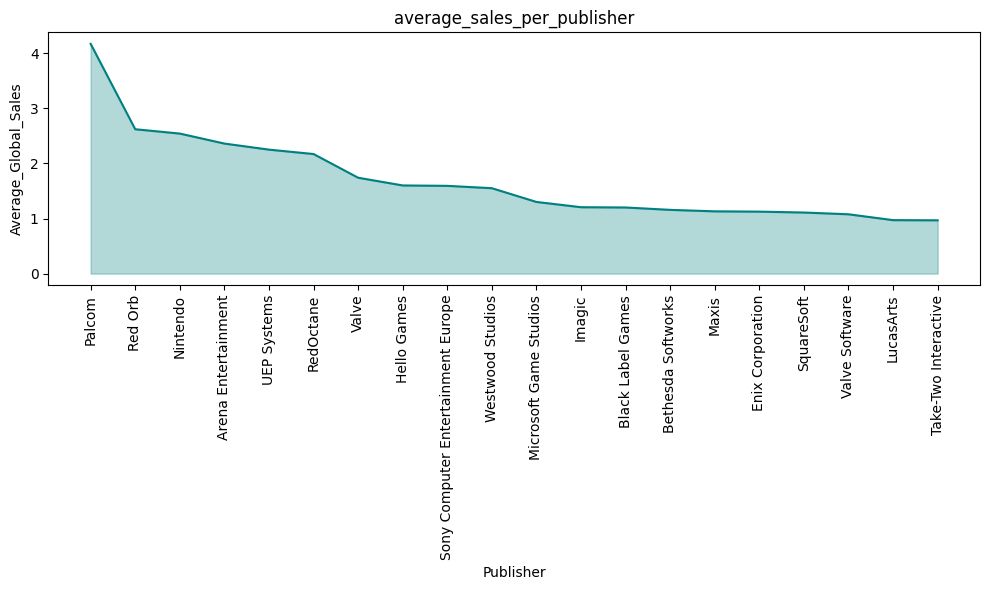

In [51]:
#19. What is the average sales per publisher?
mycursor.execute("""select Publisher,avg(NA_Sales) Average_NA_Sales,avg(EU_Sales) Average_EU_Sales,avg(JP_Sales) Average_JP_Sales,
                     avg(Other_Sales) Average_Other_Sales,avg(Global_Sales) Average_Global_Sales
                     from vgsales 
                     group by Publisher
                     order by Average_Global_Sales desc limit 20
                     
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
average_sales_per_publisher = pd.DataFrame(results, columns=["Publisher","Average_NA_Sales","Average_EU_Sales","Average_JP_Sales",
                                                             "Average_Other_Sales","Average_Global_Sales"])
average_sales_per_publisher
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(average_sales_per_publisher, x="Publisher", y="Average_Global_Sales",color="teal")
ax.fill_between(average_sales_per_publisher["Publisher"], average_sales_per_publisher["Average_Global_Sales"],color="teal", alpha=0.3)
ax.set_title("average_sales_per_publisher")
ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


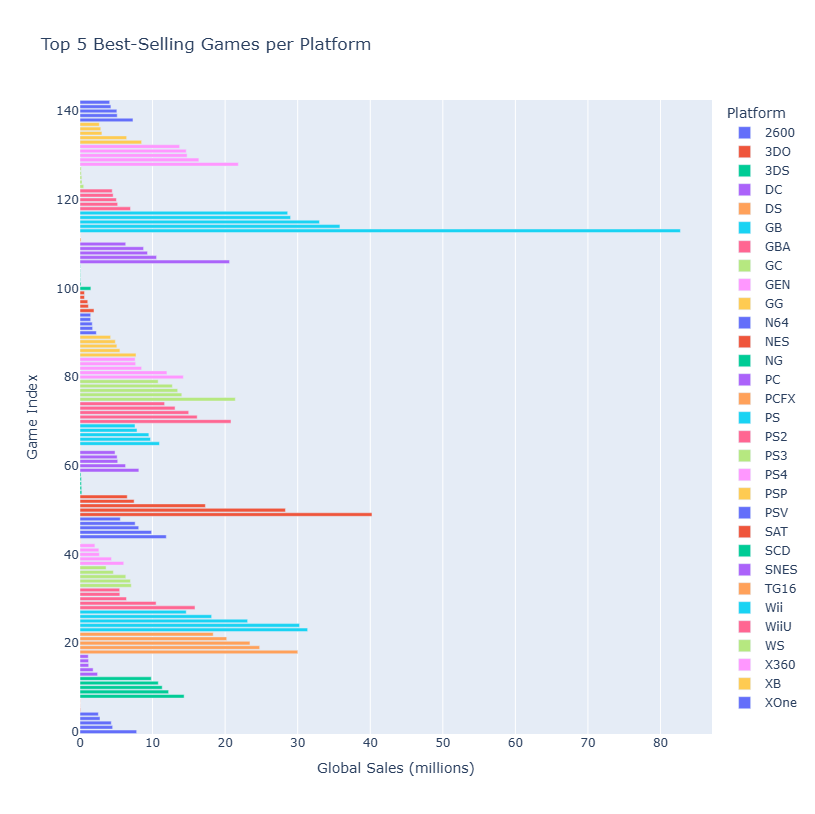

In [27]:
# 20.What are the top 5 best-selling games per platform?
mycursor.execute("""select Platform, Name, Global_Sales
from (
    select Platform, Name, Global_Sales,
           RANK() OVER (PARTITION BY Platform order by Global_Sales desc) AS rnk
    from vgsales
) ranked_games
where rnk <= 5;

                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
best_selling_games = pd.DataFrame(results, columns=["Platform","Name","Global_Sales"])
best_selling_games

best_selling_games = best_selling_games.reset_index()


fig = px.bar(best_selling_games, 
             x="Global_Sales", 
             y="index", 
             color="Platform", 
             orientation="h",  # Horizontal bars
             title="Top 5 Best-Selling Games per Platform",
             labels={"Global_Sales": "Global Sales (millions)", "index": "Game Index"},
             hover_data=["Name"])  # Show game names on hover
fig.update_layout(width=900, height=800) 
# Show the figure
fig.show()




               Genres  global_sales
0  Adventure,Platform    309.150005


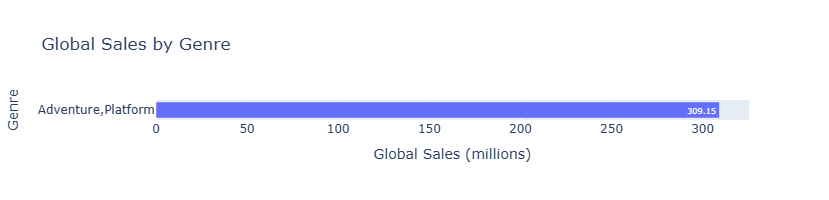

In [4]:
# 21.Which game genres generate the most global sales?
mycursor.execute("""select g.Genres,sum(v.Global_Sales) global_sales
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     group by g.Genres
                     order by global_sales desc limit 1
                     
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
genres_sales = pd.DataFrame(results, columns=["Genres","global_sales"])
print(genres_sales)

fig = px.bar(x=genres_sales["global_sales"], 
             y=genres_sales["Genres"], 
             orientation="h", 
             title="Global Sales by Genre",
             labels={"x": "Global Sales (millions)", "y": "Genre"},
             text_auto=True)  # Displays values on bars

fig.update_layout(width=600, height=200)
fig.show()


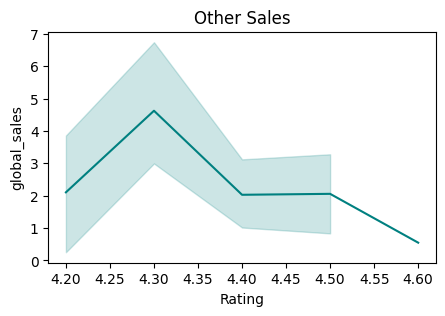

In [12]:
#22.How does user rating affect global sales?
mycursor.execute("""select g.Title,g.Rating,sum(v.Global_Sales) global_sales
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     group by g.Title,g.Rating
                     order by g.Rating desc limit 50
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
rating_globalsales = pd.DataFrame(results, columns=["Title","Rating","global_sales"])
rating_globalsales
fig, ax = plt.subplots(figsize=(5, 3))
sns.lineplot(data=rating_globalsales, x="Rating", y="global_sales",color="teal")
# ax.fill_between(rating_globalsales["Rating"], rating_globalsales["global_sales"],color="teal", alpha=0.3)
ax.set_title("Other Sales")
# plt.tight_layout())
plt.show()

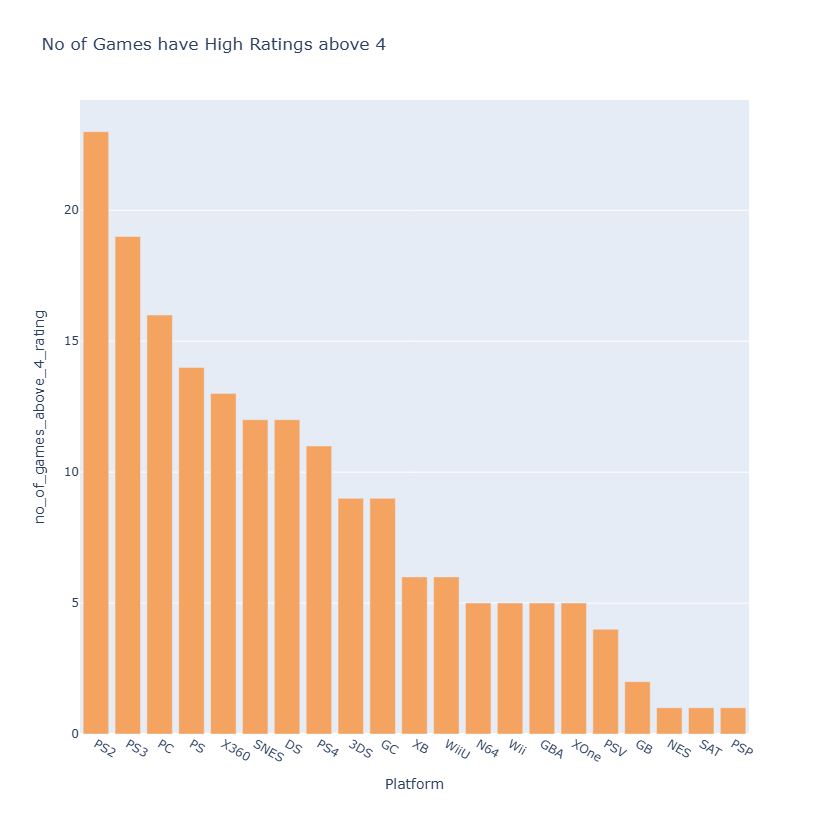

In [50]:
#23.Which platforms have the most games with high ratings (e.g., above 4)?
mycursor.execute("""select v.Platform,count(g.Title) as no_of_games_above_4_rating
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     where g.Rating > 4
                     group by v.Platform
                     order by no_of_games_above_4_rating desc 
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
rating_globalsales = pd.DataFrame(results, columns=["Platform","no_of_games_above_4_rating"])
rating_globalsales

rating_globalsales = rating_globalsales.reset_index()


fig = px.bar(rating_globalsales, 
             x="Platform", 
             y="no_of_games_above_4_rating", 
             color_discrete_sequence=["sandybrown"], 
             orientation="v",  # Horizontal bars
             title=" No of Games have High Ratings above 4 ",
             hover_data=["Platform"])  # Show game names on hover
fig.update_layout(width=900, height=800) 
# Show the figure
fig.show()

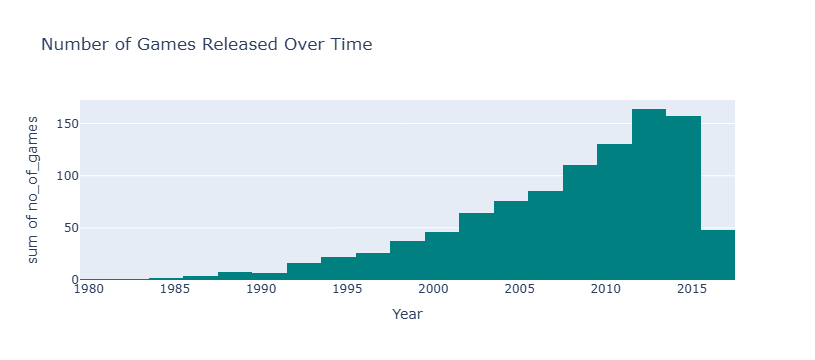

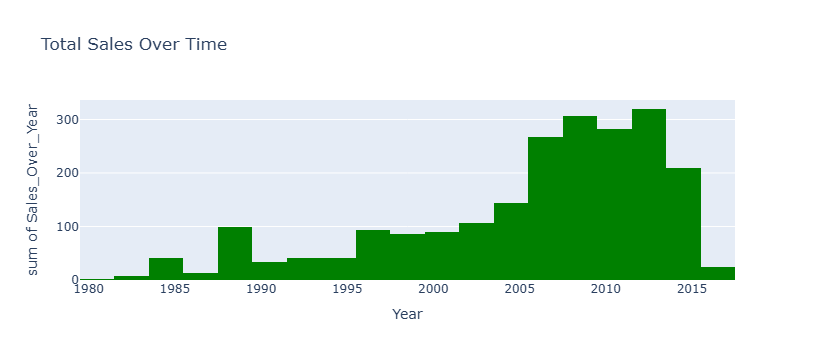

In [58]:
 #24. What’s the trend of releases and sales over time?
mycursor.execute("""select v.Year,count(g.Title) as no_of_games,sum(v.Global_Sales) Sales_Over_Year
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     group by v.Year
                     order by v.Year limit 50 offset 1
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
Game_Releases_and_Sales = pd.DataFrame(results, columns=["Year","no_of_games", "Sales_Over_Year"])
Game_Releases_and_Sales

#fig = make_subplots(rows=2, cols=1, subplot_titles=("Number of Games Released Over Time", "Total Sales Over Time"))

fig_games = px.histogram(Game_Releases_and_Sales, 
                         x="Year", 
                         y="no_of_games", 
                         nbins=20, 
                         color_discrete_sequence=["teal"], 
                         title="Number of Games Released Over Time")

# Show the figure
fig_games.show()

# Histogram for total sales over time
fig_sales = px.histogram(Game_Releases_and_Sales, 
                         x="Year", 
                         y="Sales_Over_Year", 
                         nbins=20, 
                         color_discrete_sequence=["green"], 
                         title="Total Sales Over Time")

# Show the figure
fig_sales.show()




     Wishlist  Total_NA_Sales  Total_EU_Sales  Total_JP_Sales  \
0      3300.0        1.000000            0.76            0.26   
1      2600.0        2.710000            1.29            0.02   
2      2300.0        0.950000            0.67            0.30   
3      2200.0        1.780000            0.78            2.84   
4      2100.0        1.590000            0.83            0.35   
..        ...             ...             ...             ...   
335      23.0        4.130000            0.87            0.22   
336      22.0        2.400000            1.56            0.00   
337      21.0       26.170001            2.95            6.03   
338      14.0        4.010000            1.26            0.87   
339      13.0        2.840000           11.14            0.20   

     Total_Other_Sales  Sales  
0                 0.36   2.38  
1                 0.43   4.45  
2                 0.25   2.17  
3                 0.34   5.74  
4                 0.34   3.12  
..                 ...    .

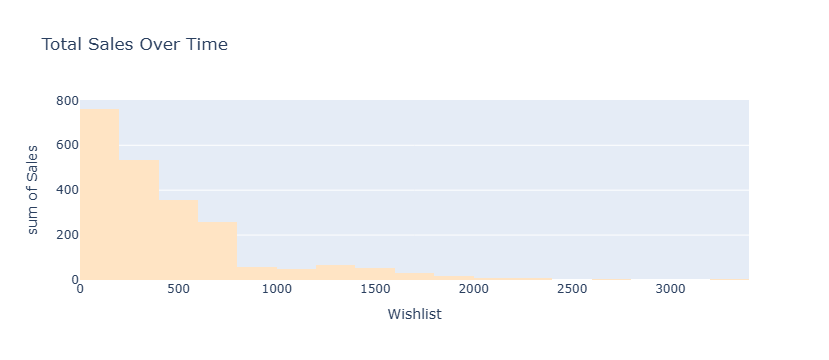

In [7]:
 # 25.Do highly wishlisted games lead to more sales?
mycursor.execute("""select g.Wishlist,sum(v.NA_Sales) Total_NA_Sales,sum(v.EU_Sales) Total_EU_Sales,
                     sum(v.JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales,sum(v.Global_Sales) Sales
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     group by g.Wishlist
                     order by g.Wishlist desc
                     
                     
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
wishlisted_games = pd.DataFrame(results, columns=["Wishlist","Total_NA_Sales","Total_EU_Sales", "Total_JP_Sales","Total_Other_Sales", "Sales"])
print(wishlisted_games)

px.histogram(wishlisted_games, 
                         x="Wishlist", 
                         y="Sales", 
                         nbins=20, 
                         color_discrete_sequence=["bisque"], 
                         title="Total Sales Over Time")







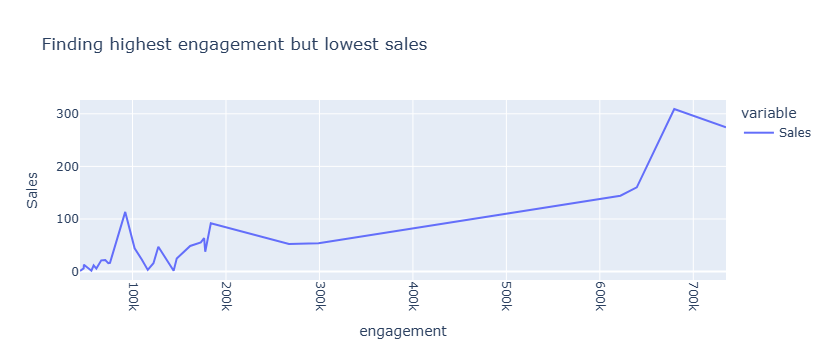

In [8]:
# 26.Which genres have the highest engagement but lowest sales?
mycursor.execute("""select g.Genres,sum(g.Plays) engagement ,count(g.Title) games_count,sum(v.NA_Sales) Total_NA_Sales,sum(v.EU_Sales) Total_EU_Sales,
                     sum(v.JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales,sum(v.Global_Sales) Sales
                     from game g
                     join vgsales v
                     on g.Title=v.Name
                     group by g.Genres
                     HAVING engagement > 5000 AND Sales > (SELECT AVG(Global_Sales) FROM vgsales)
                     order by engagement desc limit 30
                     
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
lowest_sales = pd.DataFrame(results, columns=["Genres","engagement","games_count","Total_NA_Sales","Total_EU_Sales", "Total_JP_Sales","Total_Other_Sales", "Sales"])
lowest_sales        
fig = px.line(
    lowest_sales,
    x="engagement",
    y=[ "Sales"],
    labels={"value": "Sales"},
    title="Finding highest engagement but lowest sales"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()

Correlation: 0.41191488820554756
Correlation: 0.3891684049041467
Correlation: 0.3846372245254022
Correlation: 0.7031315955518778
Correlation: 0.8322987823172313


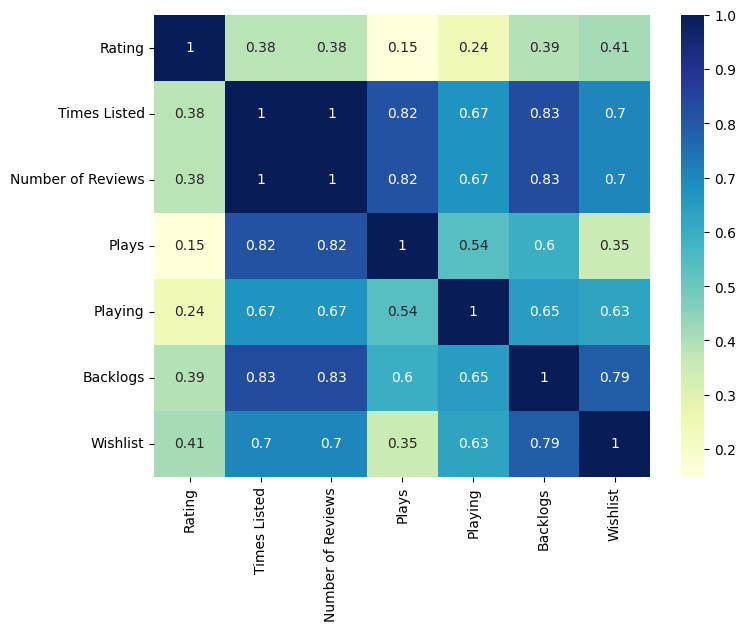

In [101]:
# 27.Do highly listed games (wishlist/backlogs) correlate with better ratings?
correlation =game_2["Wishlist"].corr(game_2["Rating"])
print("Correlation:", correlation)
correlation = game_2["Backlogs"].corr(game_2["Rating"])
print("Correlation:", correlation)
correlation = game_2["Times Listed"].corr(game_2["Rating"])
print("Correlation:", correlation)
correlation = game_2["Times Listed"].corr(game_2["Wishlist"])
print("Correlation:", correlation)
correlation = game_2["Times Listed"].corr(game_2["Backlogs"])
print("Correlation:", correlation)


numeric_game_2 = game_2.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
ax = sns.heatmap(numeric_game_2.corr(), cmap="YlGnBu", annot=True)

                                Genres  engagement
0                     Arcade,Simulator         1.0
1              Fighting,Racing,Shooter         1.0
2                       Fighting,Sport         1.0
3               Brawler,Fighting,Indie         2.0
4            Adventure,Platform,Racing         3.0
..                                 ...         ...
250              Adventure,RPG,Shooter      8419.0
251                  Adventure,Shooter      8988.0
252                 Adventure,Platform     10850.0
253  Adventure,RPG,Turn Based Strategy     12116.0
254                      Adventure,RPG     33613.0

[255 rows x 2 columns]


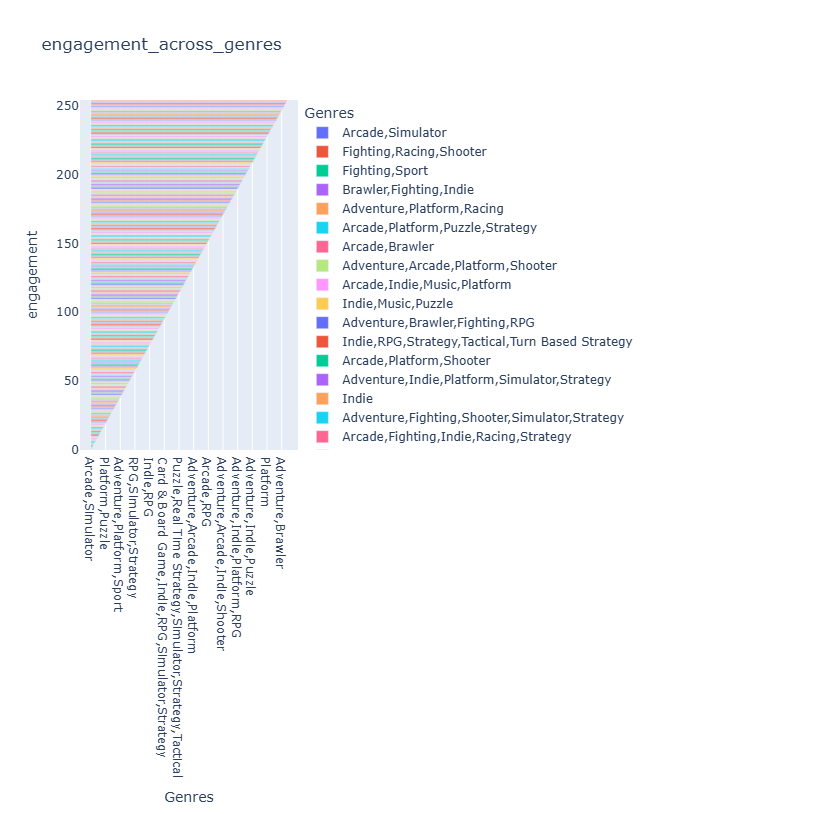

In [10]:
# 28.How does user engagement differ across genres?
mycursor.execute("""select Genres,sum(Playing) engagement 
                     from game 
                     group by Genres
                     
                     order by engagement
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
engagement_across_genres = pd.DataFrame(results, columns=["Genres","engagement"])
print(engagement_across_genres)        

engagement_across_genres = engagement_across_genres.reset_index()


fig = px.bar(engagement_across_genres, 
             x="Genres", 
             y="index", 
             color="Genres", 
             orientation="h",  # Horizontal bars
             title="engagement_across_genres",
             labels={"Genres": "Genres", "index": "engagement"},
             hover_data=["engagement"])  # Show game names on hover
fig.update_layout(width=900, height=800) 
# Show the figure
fig.show()

  Platform    Genre  Total_Sales
0      PS3   Action   307.879999
1      Wii   Sports   292.059997
2     X360  Shooter   278.550001
3      PS2   Sports   273.410000
4      PS2   Action   272.759999
5     X360   Action   242.670000
6      Wii     Misc   221.060000
7      PS3  Shooter   196.039999
8      PS2   Racing   156.279999
9     X360   Sports   139.120000


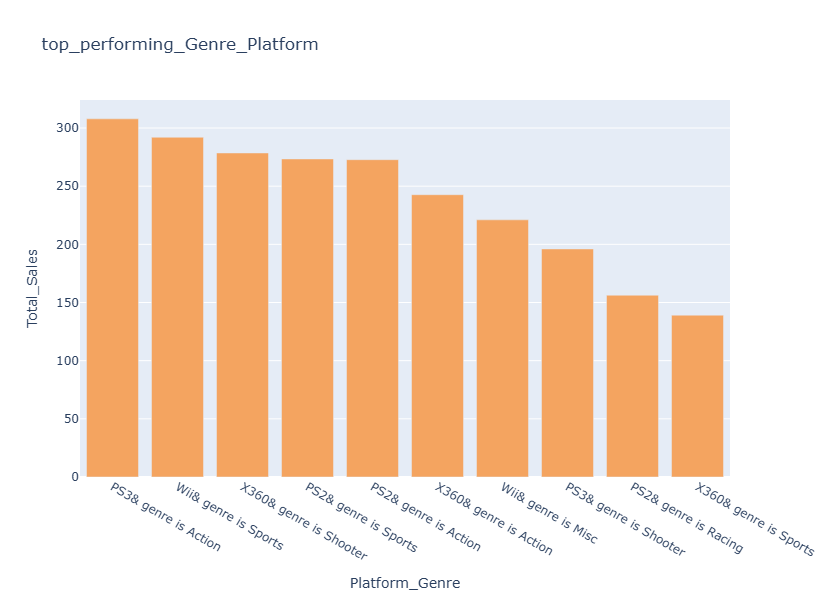

In [45]:
#29.What are the top-performing combinations of Genre + Platform?

mycursor.execute("""select  Platform,Genre, sum(Global_Sales) Total_Sales from vgsales
                  group by Platform,Genre
                  order by Total_Sales desc limit 10 """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
top_performing_Genre_Platform = pd.DataFrame(results, columns=["Platform","Genre","Total_Sales"])
print(top_performing_Genre_Platform)

top_performing_Genre_Platform["Platform_Genre"] = top_performing_Genre_Platform["Platform"] + "& genre is " + top_performing_Genre_Platform["Genre"]




fig = px.bar(top_performing_Genre_Platform, 
             x="Platform_Genre",
             y="Total_Sales", 
             color_discrete_sequence=["sandybrown"], 
             orientation="v",  # Horizontal bars
             title="top_performing_Genre_Platform ",
             hover_data=["Platform"])  # Show game names on hover
fig.update_layout(width=700, height=600) 
# Show the figure
fig.show()

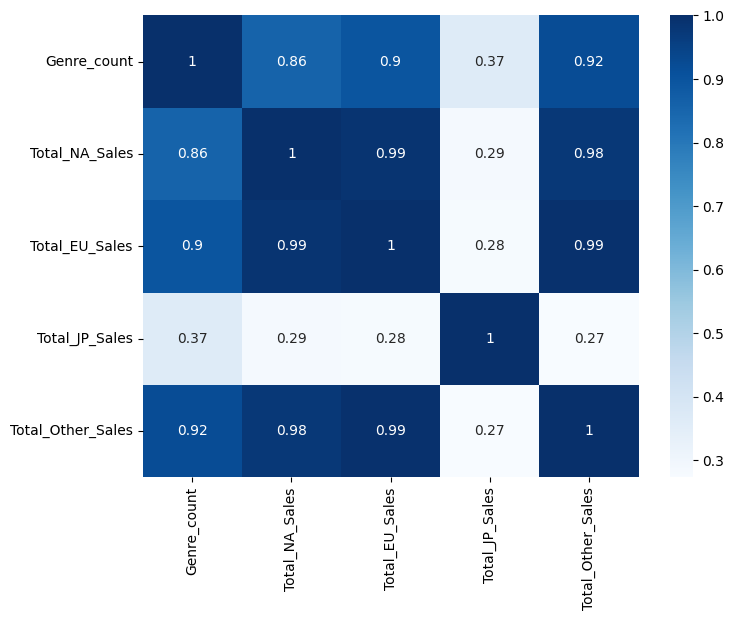

In [34]:
#30.What does a regional sales heatmap by genre reveal?
mycursor.execute("""select count(Genre) Genre_count,sum(NA_Sales) Total_NA_Sales,sum(EU_Sales) Total_EU_Sales,
                     sum(JP_Sales) Total_JP_Sales,
                     sum(Other_Sales) Total_Other_Sales
                     from  vgsales
                     group by Genre
                     
                     
                     """)
results = mycursor.fetchall()
columns = [desc[0] for desc in mycursor.description]
sales_heatmap_by_genre_reveal = pd.DataFrame(results, columns=["Genre_count","Total_NA_Sales","Total_EU_Sales", "Total_JP_Sales","Total_Other_Sales"])
sales_heatmap_by_genre_reveal       
plt.figure(figsize=(8,6))
ax = sns.heatmap(sales_heatmap_by_genre_reveal.corr(), cmap="Blues", annot=True)